<a href="https://colab.research.google.com/github/emrahyurtlu/deep-learning/blob/main/CMPE430/Lab_9_Multi_Class_Classification_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CMPE430 LAB WEEK 9 - Multi-Class Classification Examples**

15.12.2021 Thursday 14:30-16:20

Lab Assistant : Cansen Çağlayan (cansen.caglayan@atilim.edu.tr)

**References**

Book : Deep Learning with Python, François Chollet

https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/

https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9

https://www.kaggle.com/kumarsatwik/beginner-iris-dataset-classification/notebook




#**Recall : Epoch and Batch**


**Epoch** 

One Epoch is when an ENTIRE training dataset is passed forward and backward through the neural network only ONCE.

Since one epoch is too big to feed to the computer at once we divide it in several smaller batches.

One epoch leads to underfitting of the curve in the graph.

**So, what is the right numbers of epochs?**
Unfortunately, there is no right answer to this question. The answer is different for different datasets.


**Batch :**

You can’t pass the entire dataset into the neural net at once. So, you divide dataset into Number of Batches or sets or parts.

Batch size = Total number of training examples present in a single batch.

**Note:** Batch size and number of batches are two different things.

Example : Let’s say we have 2000 training examples that we are going to use .
We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

**Example :**

Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

#**Multi-Class Classification**

##**Iris Flowers Dataset**



This dataset is well studied and is a good problem for practicing on neural networks because all of the 4 input variables are numeric and have the same scale in centimeters. Each instance describes the properties of an observed flower measurements and the output variable is specific iris species.

This is a **multi-class classification** problem, meaning that there are more than two classes to be predicted, in fact there are **three flower species**. This is an important type of problem on which to practice with neural networks because the three class values require specialized handling.

Dataset : https://www.kaggle.com/uciml/iris

In [ ]:
# multi-class classification with Keras
import pandas as pd
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

**Load The Dataset**

The dataset can be loaded directly. Because the output variable contains strings, it is easiest to load the data using pandas. We can then split the attributes (columns) into input variables (X) and output variables (Y).

In [ ]:
# load dataset
dataset = pd.read_csv("IRIS.csv")

In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset["species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Check if there are any missing values
dataset.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

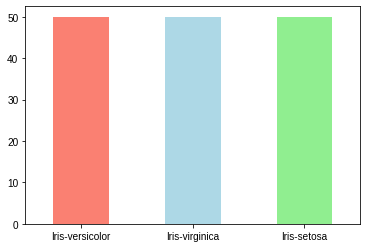

In [ ]:
dataset["species"].value_counts().plot(
    kind="bar", color=["salmon", "lightblue", "lightgreen"])
plt.xticks(rotation=0)

plt.style.use("default")
plt.style.use("seaborn-whitegrid")

In [ ]:
X = dataset.drop("species", axis=1)
y = dataset["species"]

**Encode The Output Variable**

The output variable contains three different string values.

When modeling multi-class classification problems using neural networks, it is good practice to reshape the output attribute from a vector that contains values for each class value to be a matrix with a boolean for each class value and whether or not a given instance has that class value or not.

This is called one hot encoding.

For example, in this problem three class values are Iris-setosa, Iris-versicolor and Iris-virginica. If we had the observations:

* Iris-setosa
* Iris-versicolor
* Iris-virginica

We can turn this into a one-hot encoded binary matrix for each data instance that would look as follows:

Iris-setosa,	Iris-versicolor,	Iris-virginica

1,		             0,			           0

0,		             1, 			         0

0, 		             0, 			         1

We can do this by first encoding the strings consistently to **integers** using the scikit-learn class **LabelEncoder**. Then convert the vector of integers to a **one hot encoding** using the Keras function **to_categorical().**

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to one hot encoded
one_hot_encoded_y = np_utils.to_categorical(encoded_y)

In [ ]:
"""# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]"""

'# split into train and test\nn_train = 500\ntrainX, testX = X[:n_train, :], X[n_train:, :]\ntrainy, testy = y[:n_train], y[n_train:]'

**Split the Data**

In [ ]:
#Train Test Split Function
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_encoded_y, test_size=0.2)

# %20 of data will be used for test

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
37,4.9,3.1,1.5,0.1
129,7.2,3.0,5.8,1.6
3,4.6,3.1,1.5,0.2
103,6.3,2.9,5.6,1.8
...,...,...,...,...
71,6.1,2.8,4.0,1.3
78,6.0,2.9,4.5,1.5
79,5.7,2.6,3.5,1.0
111,6.4,2.7,5.3,1.9


In [ ]:
y_train

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

In [ ]:
#model definition
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Summarize the Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 40        
                                                                 
 dense_4 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


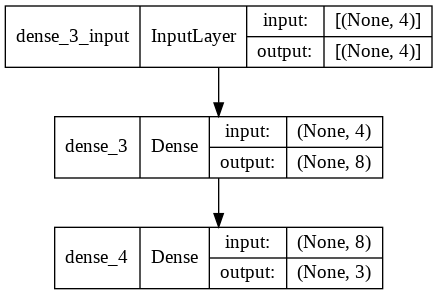

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=200, batch_size=5)

Epoch 1/200
24/24 [==============================] - 0s 4ms/step - loss: 1.5469 - accuracy: 0.3417
Epoch 2/200
24/24 [==============================] - 0s 10ms/step - loss: 1.4305 - accuracy: 0.3333
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 1.3405 - accuracy: 0.3333
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 1.2552 - accuracy: 0.3333
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 1.1815 - accuracy: 0.3333
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 1.1182 - accuracy: 0.3333
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 1.0629 - accuracy: 0.3333
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 1.0156 - accuracy: 0.3333
Epoch 9/200
24/24 [==============================] - 0s 8ms/step - loss: 0.9743 - accuracy: 0.3333
Epoch 10/200
24/24 [==============================] - 0s 6ms/step - loss: 0.9368 - accuracy: 0.3333
Epoch 11

120/5 = 24

Note that we use a “softmax” activation function in the output layer. This is to ensure the output values are in the range of 0 and 1 and may be used as predicted probabilities.

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)


1/1 [==============================] - 0s 41ms/step - loss: 0.3046 - accuracy: 0.9333


#**Classifying newswires: a multiclass classification example**

Reuters newswires into 46 mutually exclusive topics. Because you have many classes, this problem is an instance of multi-class classification; and because each data point should be classified into only one category, the problem is more specifically an instance of single-label, multiclass classification.

Reuters dataset, a set of short newswires and their topics, published
by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There
are 46 different topics; some topics are more represented than others, but each topic
has at least 10 examples in the training set.
 Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras.

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


num_words=10000 restricts the data to the
10,000 most frequently occurring words found in the data.

We have 8,982 training examples and 2,246 test examples:

In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

#Note that the indices are offset by 3 because 0, 1, and 2 are reserved  indices for “padding,” “start of sequence,” and “unknown.”

565248/550378 [==============================] - 0s 0us/step


In [ ]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
#The label associated with an example is an integer between 0 and 45—a topic index:
train_labels[10]

3

**Preparing the data**

We should vectorize the data.

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**One-hot encoding for labels.**

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
  
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

**Note :** Or we can use to_categorical

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)

one_hot_test_labels = to_categorical(test_labels)

**Model Definition**

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
#Compiling
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

**Validating your approach**

Let’s set apart 1,000 samples in the training data to use as a validation set.

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**Training the Model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.5901 - accuracy: 0.5249 - val_loss: 1.7744 - val_accuracy: 0.6250
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4343 - accuracy: 0.7033 - val_loss: 1.3218 - val_accuracy: 0.7210
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0676 - accuracy: 0.7707 - val_loss: 1.1651 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8370 - accuracy: 0.8208 - val_loss: 1.0715 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6701 - accuracy: 0.8589 - val_loss: 0.9827 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5320 - accuracy: 0.8879 - val_loss: 0.9482 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4266 - accuracy: 0.9138 - val_loss: 0.9154 - val_accuracy: 0.8020
Epoch 8/20
16

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Display its loss and accuracy curves**

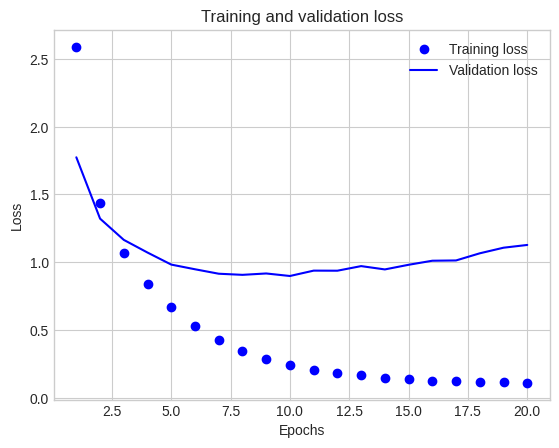

In [ ]:
#Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

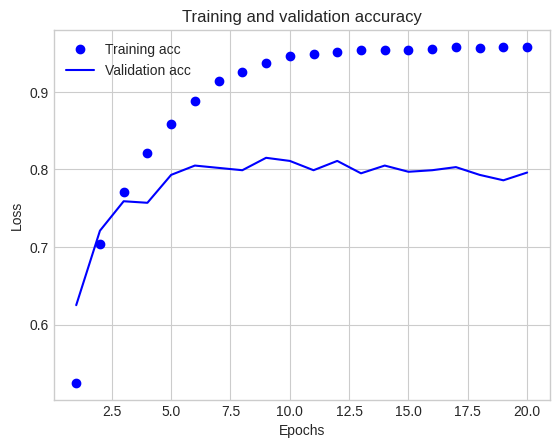

In [ ]:
#Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 5ms/step - loss: 1.3328 - accuracy: 0.7725
